In [28]:
import menpo.io as mio
import numpy as np
from menpo.shape import PointCloud 
from menpo.landmark import LandmarkGroup, LandmarkManager, labeller
from menpo.shape.mesh import TriMesh

def landmarkConverter(filename):
	file = open(filename, 'r')
	lms = file.read()
	lmsplit = lms.splitlines()
	coords = []
	for item in lmsplit:
		item = item.split()
		point = [float(item[1]),float(item[0])]
		coords.append(point)
	file.close()
	ra = np.array(coords)
	pc = PointCloud(ra)
	print(pc)
	lmg = LandmarkGroup.init_with_all_label(pc)
	print(lmg)
	lmm = LandmarkManager()
	lmm['landmarks'] = lmg
	print(lmm)
	
	return lmm, pc

In [29]:
lmm = landmarkConverter("/Users/chloehequet/face/ll042t1aaaff001_aam.txt")[0]
pc = landmarkConverter("/Users/chloehequet/face/ll042t1aaaff001_aam.txt")[1]
img = mio.import_image("/Users/chloehequet/face/ll042t1aaaff001.png")
img = img.as_greyscale()
d = img.diagonal()
if d > 400:
    img = img.rescale(400.0 / d)
img.landmarks = lmm


PointCloud: n_points: 66, n_dims: 2
LandmarkGroup: n_labels: 1, n_points: 66
LandmarkManager: n_groups: 1
(landmarks): LandmarkGroup: n_labels: 1, n_points: 66
PointCloud: n_points: 66, n_dims: 2
LandmarkGroup: n_labels: 1, n_points: 66
LandmarkManager: n_groups: 1
(landmarks): LandmarkGroup: n_labels: 1, n_points: 66


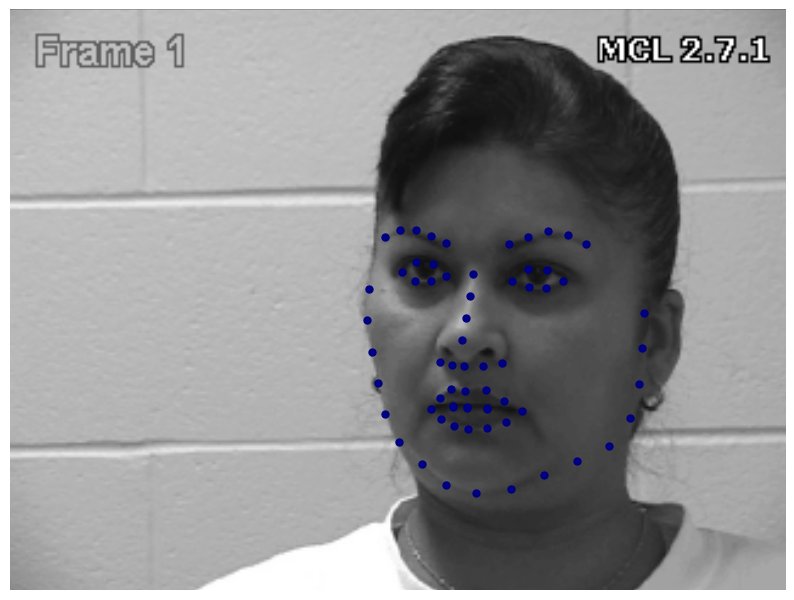

In [31]:
tm = TriMesh(pc, 'None')

%matplotlib inline
img.view_landmarks()

In [32]:
from menpofit.aam import HolisticAAM
from menpo.feature import fast_dsift